# Eine Aufgabe und ein Datensatz

Klassifikation von Bildern von Zahlen

In [105]:
import tensorflow

In [106]:
#!pip install tensorflow

In [107]:
pip list | grep tensorflow

tensorflow                   2.8.0
tensorflow-io-gcs-filesystem 0.25.0
Note: you may need to restart the kernel to use updated packages.


In [108]:
mnist_dataset = tensorflow.keras.datasets.mnist

In [109]:
type(mnist_dataset)

module

In [110]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [111]:
type(x_train)

numpy.ndarray

In [112]:
x_train.shape

(60000, 28, 28)

In [113]:
x_train.ndim

3

In [114]:
type(y_train)

numpy.ndarray

In [115]:
y_train.shape

(60000,)

In [116]:
x_test.shape

(10000, 28, 28)

In [117]:
y_test.shape

(10000,)

# Visualisieren eines der Testbilder

In [118]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [119]:
bild = x_train[0,:,:]

In [120]:
type(bild)

numpy.ndarray

In [121]:
bild.shape

(28, 28)

In [122]:
y_train[0]

5

In [123]:
import matplotlib.pyplot as plt

In [124]:
type(plt)

module

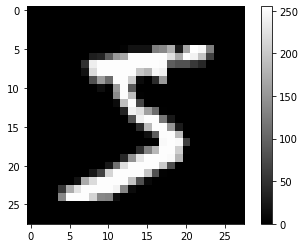

In [125]:
plt.imshow(bild, cmap="gray")
plt.colorbar()
plt.show()

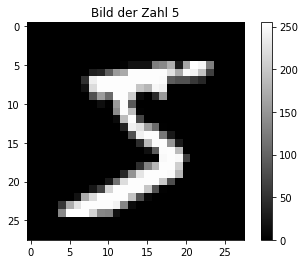

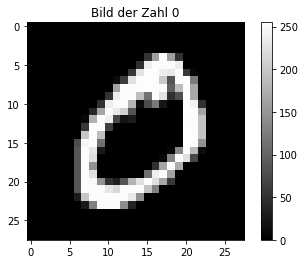

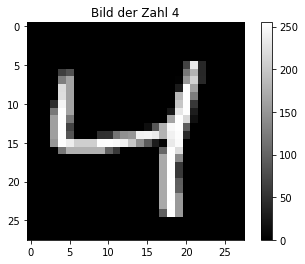

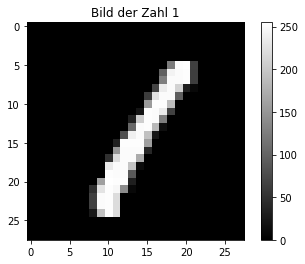

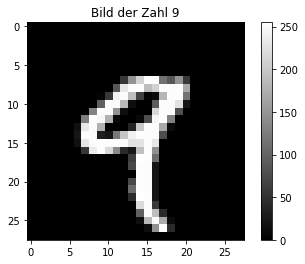

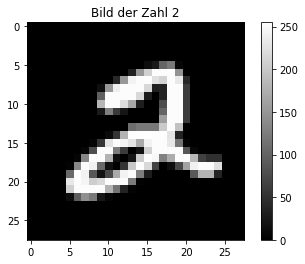

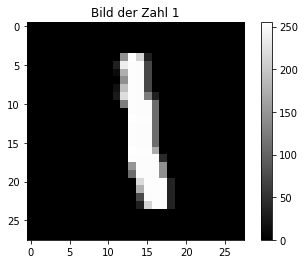

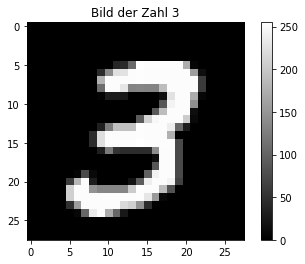

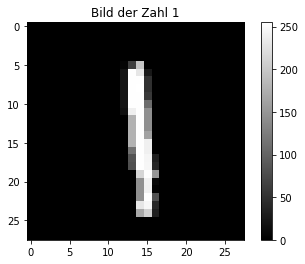

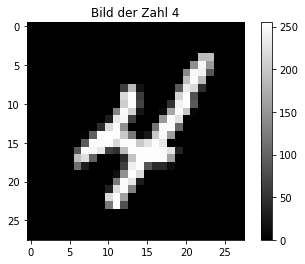

In [126]:
for i in range(0,10):
    naechstes_bild = x_train[i,:,:]
    plt.imshow(naechstes_bild, cmap="gray")
    plt.colorbar()
    label = y_train[i]
    plt.title( f"Bild der Zahl {label}" )
    plt.show()

In [127]:
28*28

784

In [128]:
bild.shape

(28, 28)

In [129]:
bild.shape[0] * bild.shape[1]

784

# Vorbereitung der Implementierung

## Erzeugen der Targets

In [130]:
y_train[:30]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7], dtype=uint8)

In [131]:
y_train.reshape(-1,1).shape

(60000, 1)

In [132]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(labels):
    enc = OneHotEncoder()
    enc.fit( labels.reshape(-1,1) )
    one_hot_kodierung = enc.transform(labels.reshape(-1,1)).toarray()
    return one_hot_kodierung

In [133]:
one_hot_kodierung = one_hot(y_train)
one_hot_kodierung

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [134]:
one_hot_kodierung[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [135]:
y_train.shape

(60000,)

In [136]:
y_train.ndim

1

In [137]:
one_hot_kodierung.shape

(60000, 10)

In [138]:
one_hot_kodierung.ndim

2

## Bilder sind 2D Inputs, Perzeptron erwartet 1D Input

In [139]:
bild.shape

(28, 28)

In [140]:
bild.ndim

2

In [141]:
bild.flatten().shape

(784,)

In [142]:
v = bild.reshape(-1)
v

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [143]:
v.shape

(784,)

In [144]:
v.ndim

1

In [145]:
import numpy as np
v_mit_bias_input = np.append(v, [1])

In [146]:
v_mit_bias_input

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Erzeugen einer Gewichtsmatrix

In [147]:
bild.shape

(28, 28)

In [148]:
bild.size

784

In [149]:
nr_inputs = bild.size + 1
nr_inputs

785

In [150]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [151]:
nr_outputs = len(np.unique(y_train))
nr_outputs

10

In [152]:
low = -0.1
high = +0.1
W = np.random.uniform(low, high, (nr_inputs, nr_outputs) )

In [153]:
W.shape

(785, 10)

In [154]:
W

array([[ 0.07116762, -0.01696371,  0.01994416, ...,  0.05277867,
         0.08084821, -0.00796431],
       [-0.09458967,  0.09205422,  0.00869284, ...,  0.05862041,
         0.06834706, -0.07731298],
       [-0.0652518 ,  0.04801498, -0.00772148, ..., -0.05338972,
        -0.07615182,  0.06651714],
       ...,
       [ 0.07150218, -0.02543961, -0.0431424 , ..., -0.09093637,
        -0.0112344 ,  0.03128632],
       [ 0.04564774, -0.04379423,  0.0315928 , ...,  0.08665995,
        -0.05803166, -0.06424712],
       [ 0.09906576,  0.07201449, -0.05628267, ..., -0.03928699,
        -0.01086243, -0.05033143]])

## Berechnung des Aktivierungsvektors

In [155]:
A = np.arange(1,10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [156]:
B = A.copy()
B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [157]:
id(A)

140462222598576

In [158]:
id(B)

140462222599248

In [159]:
C = A * B
C

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [160]:
1*1 + 2*4 + 3*7

30

In [161]:
np.matmul(A,B)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [162]:
A @ B

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [163]:
inp_matrix = v_mit_bias_input.reshape(1,785)
inp_matrix.shape

(1, 785)

In [164]:
act_matrix = inp_matrix @ W
act_matrix

array([[ 103.44002725,   17.40763833,   -2.0052063 ,  -45.87539725,
        -134.23944749,  130.99265122,  -54.54481634,  123.04904433,
          -1.65356592, -178.07966204]])

In [165]:
act_matrix.shape

(1, 10)

## Berechnung des Outputvektors

In [166]:
def RELU(act):
    if act < 0:
        return 0
    else:
        return act
    
RELUvec = np.vectorize(RELU, otypes=[float])

In [167]:
type(RELU)

function

In [168]:
type(RELUvec)

numpy.vectorize

In [169]:
RELU(-0.5)

0

In [170]:
RELU(200)

200

In [171]:
act_vector = act_matrix.flatten()
act_vector

array([ 103.44002725,   17.40763833,   -2.0052063 ,  -45.87539725,
       -134.23944749,  130.99265122,  -54.54481634,  123.04904433,
         -1.65356592, -178.07966204])

In [172]:
act_vector.ndim

1

In [173]:
out_vec = RELUvec( act_vector )
out_vec

array([103.44002725,  17.40763833,   0.        ,   0.        ,
         0.        , 130.99265122,   0.        , 123.04904433,
         0.        ,   0.        ])

## Berechnung des Fehlervektors

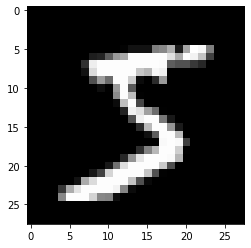

In [177]:
plt.imshow(bild, cmap="gray")
plt.show()

In [175]:
out_vec

array([103.44002725,  17.40763833,   0.        ,   0.        ,
         0.        , 130.99265122,   0.        , 123.04904433,
         0.        ,   0.        ])

In [178]:
t_vec = one_hot_kodierung[0]
t_vec

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [179]:
error_vec = t_vec - out_vec

In [180]:
error_vec

array([-103.44002725,  -17.40763833,    0.        ,    0.        ,
          0.        , -129.99265122,    0.        , -123.04904433,
          0.        ,    0.        ])

## Berechnung aller Gewichtsänderungen

In [181]:
nr_inputs

785

In [182]:
nr_outputs

10

In [184]:
alpha = 0.001
for out_neuron_nr in range(0, nr_outputs):
    print(out_neuron_nr)
    for inp_nr in range(0, nr_inputs):
        # Perceptron learn rule:
        delta_w = alpha * error_vec[out_neuron_nr] * v_mit_bias_input[inp_nr]
        W[inp_nr, out_neuron_nr] += delta_w

0
1
2
3
4
5
6
7
8
9


# Alle Einzelteile zu einem Programm zusammensetzen

In [21]:
import tensorflow
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def RELU(act):
    if act < 0:
        return 0
    else:
        return act
    
RELUvec = np.vectorize(RELU, otypes=[float])


def one_hot(labels):
    enc = OneHotEncoder()
    enc.fit( labels.reshape(-1,1) )
    one_hot_kodierung = enc.transform(labels.reshape(-1,1)).toarray()
    return one_hot_kodierung


def preprocess_data(M):
    M = M.astype(float)
    M = M * (1.0/255.0)
    return M


def prepare_data():
    
    mnist_dataset = tensorflow.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
    
    x_train = preprocess_data(x_train)
    x_test  = preprocess_data(x_test)
    
    y_train_one_hot = one_hot(y_train)
    y_test_one_hot  = one_hot(y_test)
    
    return x_train, y_train_one_hot, \
           x_test, y_test_one_hot


def perceptron_predict(image, W):
    
    # Inputvektor vorbereiten mit Bias Input
    v = image.reshape(-1)
    v_mit_bias_input = np.append(v, [1])
    
    # Aktivierungen der Neurone berechnen
    inp_matrix = v_mit_bias_input.reshape(1,785)
    act_matrix = inp_matrix @ W
    act_vector = act_matrix.flatten()
    
    # Outputs der Neurone berechnen
    out_vec = RELUvec( act_vector )
    
    return v_mit_bias_input, out_vec


def perceptron_train(v_mit_bias_input, out_vec, t_vec, W):
    
    error_vec = t_vec - out_vec
    
    alpha = 0.001
    for out_neuron_nr in range(0, nr_outputs):        
        for inp_nr in range(0, nr_inputs):
            # Perceptron learn rule:
            delta_w = alpha * error_vec[out_neuron_nr] * v_mit_bias_input[inp_nr]
            W[inp_nr, out_neuron_nr] += delta_w
            
            
# 1. hole Trainingsdaten
x_train, y_train_one_hot, x_test, y_test_one_hot = prepare_data()

# 2. bereite Gewichtsmatrix vor
nr_inputs = 28**2 + 1
nr_outputs = 10
low = -0.1
high = +0.1
W = np.random.uniform(low, high, (nr_inputs, nr_outputs) )

# 3. Training des NN
HOW_MANY_STEPS_TO_TRAIN = 1000
for train_step_nr in range(0, HOW_MANY_STEPS_TO_TRAIN):
    
    # zufälliges Trainingsbild auswählen
    sample_id = np.random.randint(0, 1)
    image = x_train[sample_id]
    t_vec = y_train_one_hot[sample_id]
    
    v_mit_bias_input, out_vec = perceptron_predict(image, W)
    perceptron_train(v_mit_bias_input, out_vec, t_vec, W)